In [41]:
import pandas as pd

def clean_data(df):
    # Filter rows based on column: 'department_ind_agency'
    df = df[df['department_ind_agency'] == "DEPT OF DEFENSE"]
    # Change column type to float64 for column: 'award'
    df = df.astype({'award': 'float64'})
    return df

# Loaded variable 'df' from URI: c:\Users\LNshuti\OneDrive - Sony\Desktop\learn\usgov-contracts-rag\data\sample_contract_df.parquet
df = pd.read_parquet(r'c:\\Users\\LNshuti\\OneDrive - Sony\\Desktop\\learn\\usgov-contracts-rag\\data\\sample_contract_df.parquet')

df_clean = clean_data(df.copy())
df_clean.head()

,department_ind_agency,cgac,sub_tier,fpds_code,office,aac_code,posteddate,type,basetype,popstreetaddress,...,popcountry,active,awardnumber,awarddate,award,awardee,state,city,zipcode,countrycode
0,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W072 ENDIST BUFFALO,W912P4,2022-11-10 15:45:16.852-05,Solicitation,Solicitation,None,...,USA,No,None,None,NaN,None,NY,BUFFALO,14207-3199,USA
1,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-11-10 15:44:09.961-05,Sources Sought,Sources Sought,None,...,USA,No,None,None,NaN,None,DC,WASHINGTON,203011000,USA
2,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W7M4 USPFO ACTIVITY HIANG 154,W50SLF,2022-11-10 15:25:21.391-05,Combined Synopsis/Solicitation,Sources Sought,None,...,USA,No,None,None,NaN,None,HI,HONOLULU,96816-4495,USA
10,DEPT OF DEFENSE,17,DEPT OF THE NAVY,1700,NAVAL RESEARCH LABORATORY,N00173,2022-11-10 11:40:05.725-05,Special Notice,Special Notice,None,...,USA,No,None,None,NaN,None,DC,WASHINGTON,20375-5328,USA
12,DEPT OF DEFENSE,17,DEPT OF THE NAVY,1700,NAVAL AIR SYSTEMS COMMAND,N00019,2022-11-10 10:43:56.718-05,Award Notice,Award Notice,None,...,USA,No,N0001920G0005,2022-10-24,160156.0,NORTHROP GRUMMAN SYSTEMS CORPORATION IL 60008-...,MD,PATUXENT RIVER,20670-5000,USA


In [52]:
import matplotlib.pyplot as plt

# Group by 'award' and calculate the sum of 'award_amount' for each group
df_clean_grouped = df_clean.groupby('office')['award_amount'].sum()

# Sort the groups by 'award_amount' in descending order and get the top 15
df_sorted = df_clean_grouped.sort_values(ascending=False).head(15)

df_sorted

office
DLA LAND AND MARITIME                 1.977653e+13
DLA AVIATION                          1.426716e+13
NAVSUP WEAPON SYSTEMS SUPPORT MECH    9.680362e+12
DLA TROOP SUPPORT                     5.925161e+12
NAVSUP WEAPON SYSTEMS SUPPORT         3.755201e+12
NAVAL RESEARCH LABORATORY             1.390334e+12
DLA AVIATION AT PHILADELPHIA, PA      9.095642e+11
NAVAIR WARFARE CTR AIRCRAFT DIV       8.056140e+11
DLA ENERGY                            8.056140e+11
DLA LAND WARREN                       7.796265e+11
NAVAL AIR SYSTEMS COMMAND             7.796265e+11
MSC NORFOLK                           5.847199e+11
DLA MARITIME - PUGET SOUND            5.457385e+11
NSWC CRANE                            5.327448e+11
W6QM MICC-FT DRUM                     5.327448e+11
Name: award_amount, dtype: float64

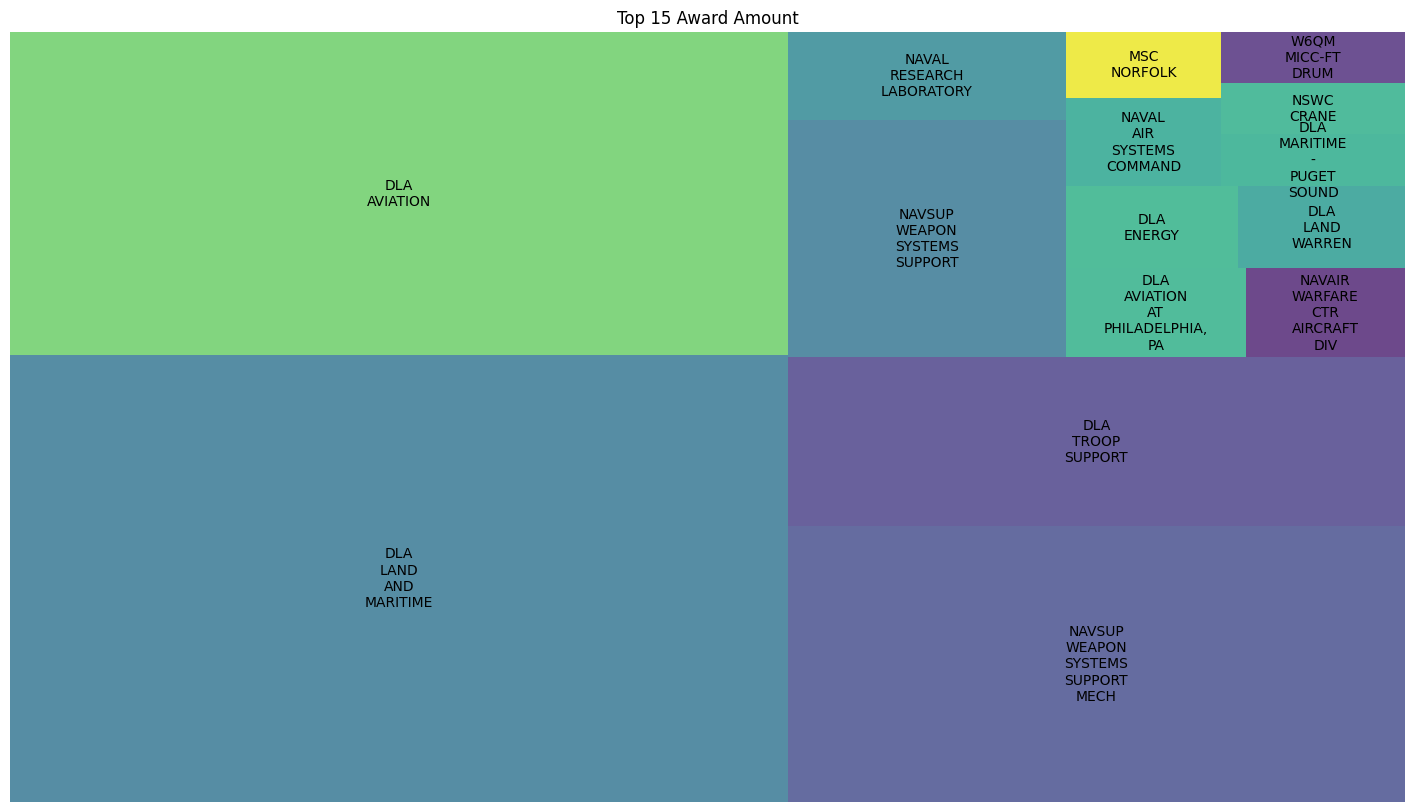

In [61]:
import matplotlib.pyplot as plt
import squarify

# Normalize the award amount for the plot
norm = df_sorted / 1_000_000_000
norm = norm / norm.sum()

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(18, 10))

# Split each label at the space character and join the parts with a newline character
labels = ['\n'.join(label.split(' ')) for label in df_sorted.index]

# Create a treemap
squarify.plot(sizes=norm, label=labels, alpha=.8)

# Set labels
plt.title('Top 15 Award Amount')
plt.axis('off')

plt.show()